# 机器学习 - 线性回归

ex1data1.txt文件中第一列为一个城市的人口，第二列是该城市一辆快餐车的利润

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


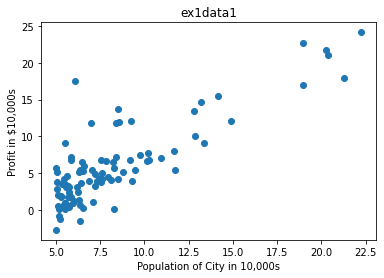

In [2]:
# Plotting the data
x = []
y = []
with open('ex1data1.txt', 'r', encoding='utf-8') as data1:
    for i in data1:
        x.append([float(i.split(',')[0])])
        y.append([float(i.split(',')[1])])
x = np.array(x)
y = np.array(y)
x_label = 'Population of City in 10,000s'
y_label = 'Profit in $10,000s'
plt.scatter(x, y)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('ex1data1')
plt.show()

In [3]:
# Computing the cost J(θ)
def computeCost(X, y, theta):
    return np.sum(np.power((X.dot(theta)-y), 2))/(2*len(y))


iterations = 1500  # 迭代次数
alpha = 0.01    # 学习率
X = np.column_stack((np.ones((len(x), 1)), x))    # 在x前添加一列x_0，值全为1
theta = np.zeros((2, 1))  # 初始化theta
computeCost(X, y, theta)

32.072733877455676

In [4]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iterations):
    temp = np.zeros(theta.shape)
    cost = np.zeros(iterations)
    for i in range(iterations):
        value = X.dot(theta)-y
        for j in range(len(theta)):
            temp[j] = theta[j]-(alpha/len(X)) * \
                np.sum(np.multiply(value, X[:, j:j+1]))
        theta = temp
        # print(i, ' ', theta)
        cost[i] = computeCost(X, y, theta)
    return cost, theta


cost, new_theta = gradientDescent(X, y, theta, alpha, iterations)
print(new_theta)
print(computeCost(X, y, new_theta))

# test case
predict1 = np.dot(np.array([[1,3.5]]),new_theta)
predict2 = np.dot(np.array([[1,7]]),new_theta)
print(f"predict1: test case: [1, 3.5] prediction: {np.sum(predict1)}")
print(f"predict2: test case: [1, 7] prediction: {np.sum(predict2)}")

[[-3.63029144]
 [ 1.16636235]]
4.483388256587726
predict1: test case: [1, 3.5] prediction: 0.45197678677017716
predict2: test case: [1, 7] prediction: 4.534245012944714


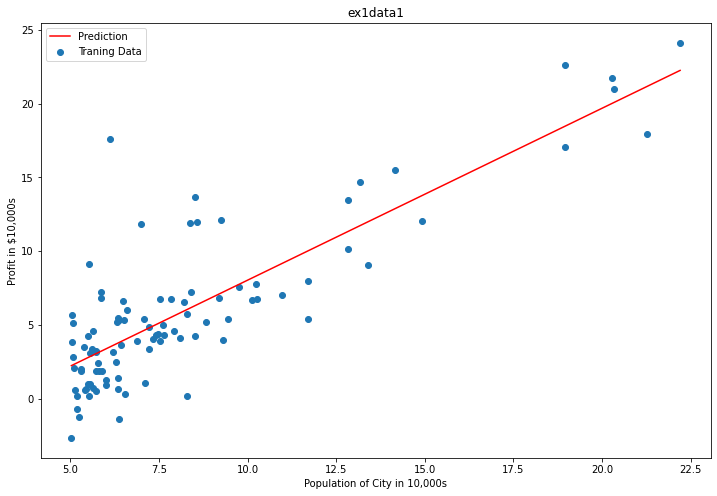

In [5]:
# Plotting the data
plt.figure(figsize=(12,8))
x_label = 'Population of City in 10,000s'
y_label = 'Profit in $10,000s'
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.scatter(x, y,label='Traning Data')
x_2 = np.linspace(x.min(),x.max(),100)
f = new_theta[0]+new_theta[1]*x_2
plt.plot(x_2, f,c = 'red',label='Prediction')
plt.legend(loc=2)
plt.title('ex1data1')
plt.show()

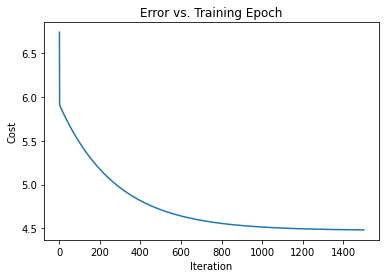

In [6]:
# Visualizing J(θ)
iter = np.linspace(1, iterations, 1500)
plt.plot(iter, cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')
plt.show()

ex1data2.txt文件包含了房价的数据集，第一列是房子的面积，第二列是卧室的数量，第三列是房子的价格

In [7]:
# Feature normalization
path = 'ex1data2.txt'
df = pd.read_csv(path, header=None, names=['Size', 'Number', 'Price'])
df = (df-df.mean())/df.std()

In [8]:
# Gradient descent
multi_X = df[df.columns[0:2]]
multi_X.insert(0,'x_0',1)
multi_X = np.array(multi_X)
multi_y = df['Price']
multi_y = np.array(multi_y)
multi_y.resize((len(multi_y),1))
multi_theta = np.zeros((multi_X.shape[1],multi_y.shape[1]))
multi_iterations = 1500
multi_alpha = 0.01

multi_cost ,multi_theta_2 = gradientDescent(multi_X,multi_y,multi_theta,multi_alpha,multi_iterations)
print(multi_theta_2)
print(computeCost(multi_X,multi_y,multi_theta_2))

[[-1.10898288e-16]
 [ 8.84042349e-01]
 [-5.24551809e-02]]
0.130686706060959


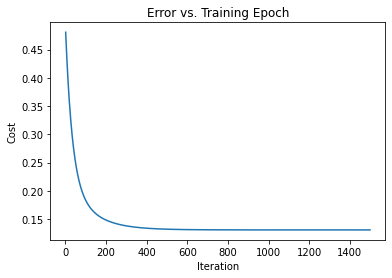

In [12]:
# Visualizing J(θ)
iter = np.linspace(1, multi_iterations, 1500)
plt.plot(iter, multi_cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')
plt.show()

In [19]:
# Selecting learning rates


def select(learning_rates, X, y, theta, iterations):
    min = 100
    min_learning_rate = 0
    for i in learning_rates:
        cost, theta_2 = gradientDescent(X, y, theta, i,iterations)
        temp = computeCost(X, y, theta_2)
        if min > temp:
            min_learning_rate = i
            min = temp
    print(f'The best learning rate is {min_learning_rate}')
    print(f'The cost function = {min}')

learning_rates = [0.015,0.01, 0.0066, 0.0033, 0.001] 
select(learning_rates,multi_X,multi_y,multi_theta,multi_iterations)     

The best learning rate is 0.015
The cost function = 0.13068648087979193


In [25]:
# Normal equations
from ast import NotEq


def normalEquation(X,y):
    temp = np.linalg.inv(X.T@X)
    return temp@X.T@y
theta = normalEquation(multi_X,multi_y)
print(theta)
print(computeCost(multi_X,multi_y,theta))

[[-1.11022302e-16]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
0.13068648053904192
